In [1]:
!pip install uncertainties

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.2 MB/s eta 0:00:00


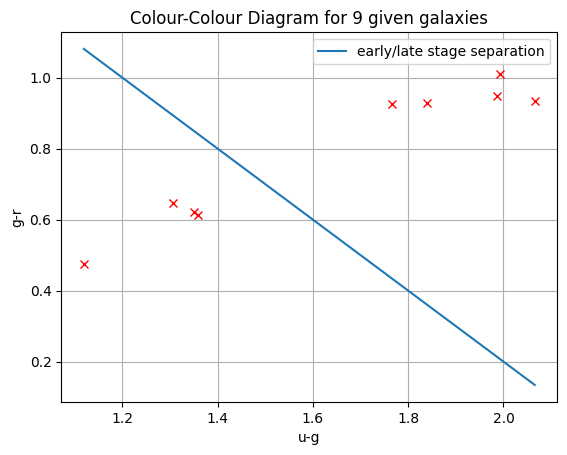

In [2]:
# Import and variable declaration

import numpy as n
import matplotlib.pyplot as m
import pandas as p
import uncertainties as u

df = p.read_csv("Galaxy.csv", header = 1)

ugPrimary = df["u"] - df["g"]
grPrimary = df["g"] - df["r"]

xVals = n.linspace(n.min(ugPrimary), n.max(ugPrimary), 100)
Yvals = -xVals + 2.2
m.plot(ugPrimary, grPrimary, "rx")
m.plot(xVals, Yvals, label = "early/late stage separation")
m.title("Colour-Colour Diagram for 9 given galaxies")
m.grid()
m.xlabel("u-g")
m.ylabel("g-r")
m.legend(loc = "best")
m.show()


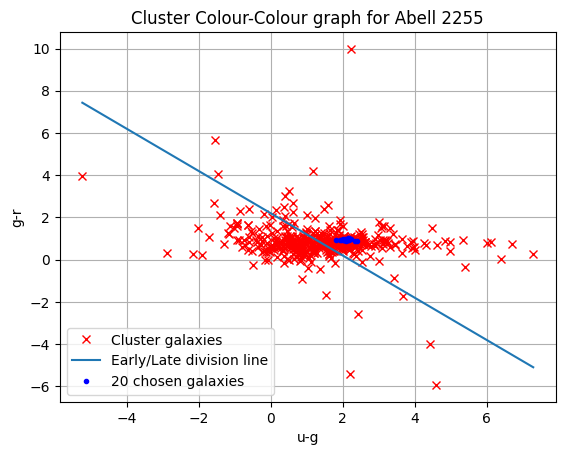

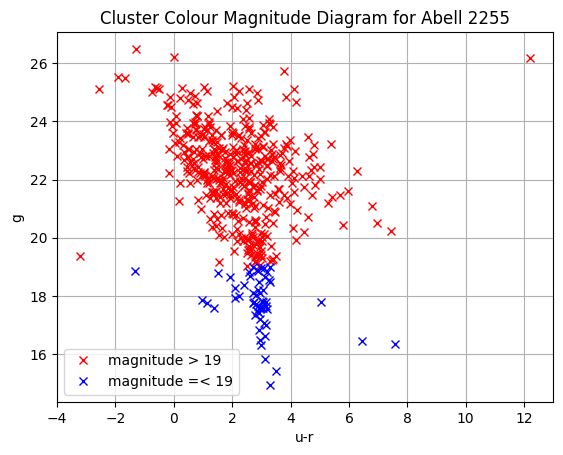

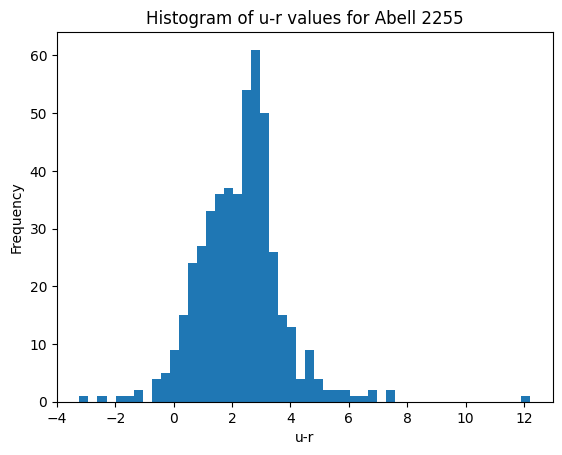

Galaxy Mean = 2.2864275259875257
Uncertainty in galaxy mean: 0.00301146750951437
Galaxy Standard Deviation = 1.448515872076412
Bright galaxies: 56
Mean u-r (bright): 2.887022678571429
Uncertainty in galaxy mean bright: 0.00237186479424283
Faint galaxies: 293
Mean u-r (faint): 2.455271433447099
Uncertainty in galaxy mean faint: 0.002641437685013551
Early type: 265
Late type: 216
Fraction early: 0.5509355509355509
Uncertainty in fraction Early: 0.022679433274685194


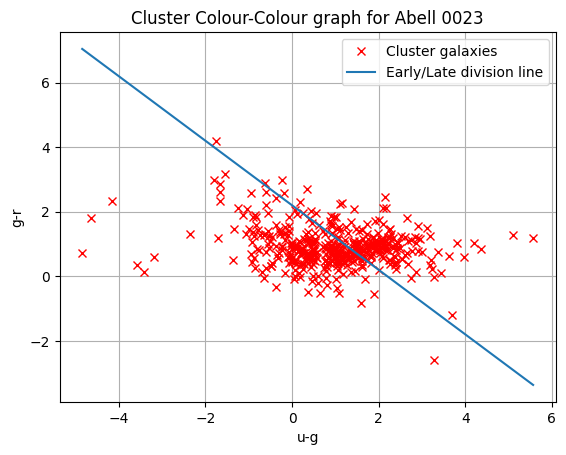

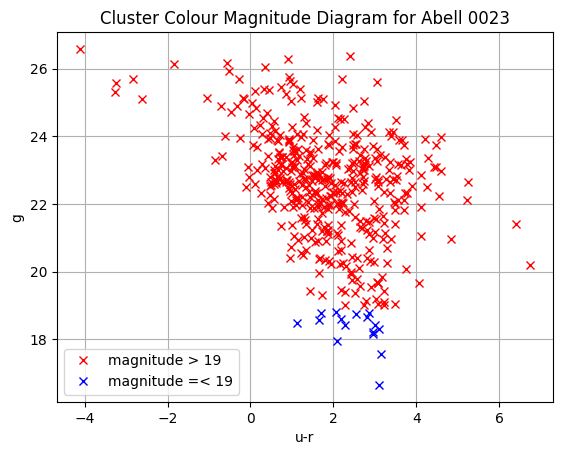

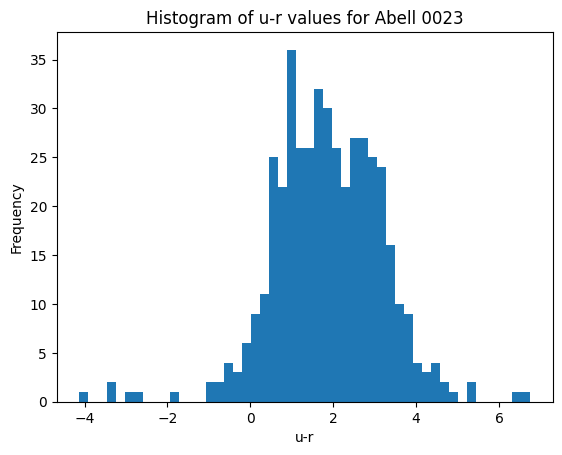

Galaxy Mean = 1.8626723423423424
Uncertainty in galaxy mean: 0.0029531703336658313
Galaxy Standard Deviation = 1.311207628147629
Bright galaxies: 16
Mean u-r (bright): 2.4716449999999996
Uncertainty in galaxy mean bright: 0.0013599050968918563
Faint galaxies: 252
Mean u-r (faint): 2.121419246031746
Uncertainty in galaxy mean faint: 0.0024757158104520708
Early type: 173
Late type: 271
Fraction early: 0.38963963963963966
Uncertainty in fraction Early: 0.02314372401751595


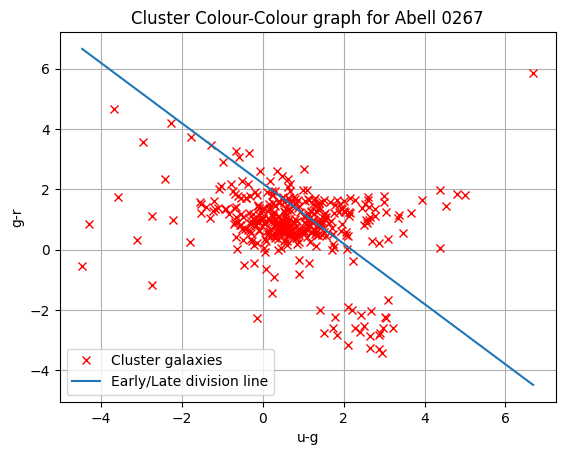

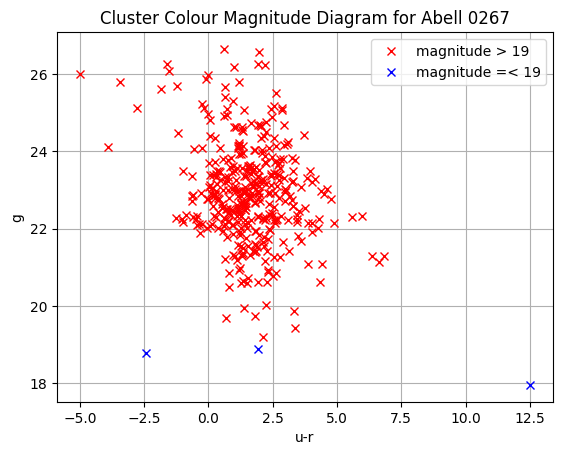

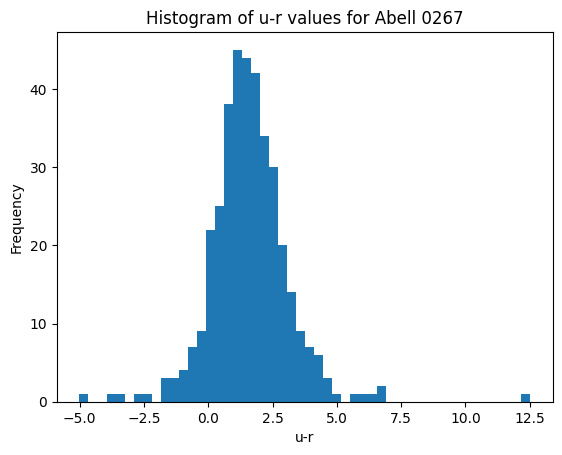

Galaxy Mean = 1.597543421750663
Uncertainty in galaxy mean: 0.004105588665285203
Galaxy Standard Deviation = 1.5478069268125216
Bright galaxies: 3
Mean u-r (bright): 4.0105933333333335
Uncertainty in galaxy mean bright: 0.0166533884973652
Faint galaxies: 209
Mean u-r (faint): 1.7214159330143541
Uncertainty in galaxy mean faint: 0.0037284839732483646
Early type: 114
Late type: 263
Fraction early: 0.30238726790450926
Uncertainty in fraction Early: 0.023654745213677966


In [3]:
dx = p.read_csv("20Galaxies2255a.csv", header = 1)
#dy = p.read_csv("Skyserver.csv", header = 1)
#fy = dy[dy['type'] == 3]

def ClusterAnalysis(Filname, ClusterName):

    # We obtain Galaxy Values from general search which have type 3

    global dx

    df = p.read_csv(Filname, header = 1)
    FilterGalaxies = df[df['type'] == 3]

    # We take the gr and ug values for cluster and compare to our galaxy values

    OwnUG = dx["u"] - dx["g"]
    OwnGR = dx["g"] - dx["r"]

    ClusterGR = FilterGalaxies["g"] - FilterGalaxies["r"]
    ClusterUG = FilterGalaxies["u"] - FilterGalaxies["g"]
    ClusterUR = FilterGalaxies["u"] - FilterGalaxies["r"]
    ClusterG = FilterGalaxies["g"]

    xVals = n.linspace(n.min(ClusterUG), n.max(ClusterUG), 100)
    Yvals = -xVals + 2.2

    # We plot together on a colour-colour graph

    m.plot(ClusterUG, ClusterGR, "rx", label = "Cluster galaxies")
    m.plot(xVals, Yvals, label = "Early/Late division line")
    m.plot(OwnUG, OwnGR, "b.", label = "20 chosen galaxies")
    m.xlabel("u-g")
    m.ylabel("g-r")
    m.title(f"Cluster Colour-Colour graph for {ClusterName}")
    m.legend(loc = "best")
    m.grid()
    m.show()

    # We make colour magnitude diagram for cluster
    # We apply a visual mask for values greater than g > 19

    mask = ClusterG > 19
    mask2 = ClusterG <= 19
    masked_ClusterUR = ClusterUR[mask]
    masked_ClusterG = ClusterG[mask]
    masked_ClusterUR2 = ClusterUR[mask2]
    masked_ClusterG2 = ClusterG[mask2]

    m.plot(masked_ClusterUR, masked_ClusterG, "rx", label = "magnitude > 19")
    m.plot(masked_ClusterUR2, masked_ClusterG2, "bx", label = "magnitude =< 19")
    m.title(f"Cluster Colour Magnitude Diagram for {ClusterName}")
    m.xlabel("u-r")
    m.ylabel("g")
    m.legend(loc = "best")
    m.grid()
    m.show()

    # We make a histogram of the u-r values

    m.hist(ClusterUR, bins = 50)
    m.xlabel("u-r")
    m.ylabel("Frequency")
    m.title(f"Histogram of u-r values for {ClusterName}")
    m.show()

    print(f"Galaxy Mean = {n.mean(ClusterUR)}")
    standard_deviation = n.std(ClusterUR)
    meanErr = standard_deviation/len(ClusterUR)
    print(f"Uncertainty in galaxy mean: {meanErr}")
    print(f"Galaxy Standard Deviation = {n.std(ClusterUR)}")

    bright = (ClusterG > 15) & (ClusterG < 19)
    faint = (ClusterG >= 19) & (ClusterG < 23)

    print("Bright galaxies:", n.sum(bright))
    print("Mean u-r (bright):", n.mean(ClusterUR[bright]))
    standard_deviationBright = n.std(ClusterUR[bright])
    meanErrBright = standard_deviationBright/len(ClusterUR)
    print(f"Uncertainty in galaxy mean bright: {meanErrBright}")

    print("Faint galaxies:", n.sum(faint))
    print("Mean u-r (faint):", n.mean(ClusterUR[faint]))
    standard_deviationFaint = n.std(ClusterUR[faint])
    meanErr = standard_deviationFaint/len(ClusterUR)
    print(f"Uncertainty in galaxy mean faint: {meanErr}")


    early = ClusterGR > (-ClusterUG + 2.2)
    late = ClusterGR <= (-ClusterUG + 2.2)

    num_early = n.sum(early)
    num_late = n.sum(late)

    FracEarly = num_early/(num_early+num_late)

    print("Early type:", num_early)
    print("Late type:", num_late)
    print("Fraction early:", num_early/(num_early+num_late))

    Uncertainty_Fraction = n.sqrt(FracEarly*(1 - FracEarly) / (num_early + num_late))
    print(f"Uncertainty in fraction Early: {Uncertainty_Fraction}")


# We create an adjusted fit where we dont compare to our 2 galaxies

def ClusterAnalysis2(Filname, ClusterName):

    # We obtain Galaxy Values from general search which have type 3

    df = p.read_csv(Filname, header = 1)
    FilterGalaxies = df[df['type'] == 3]

    # We take the gr and ug values for cluster and compare to our galaxy values

    ClusterGR = FilterGalaxies["g"] - FilterGalaxies["r"]
    ClusterUG = FilterGalaxies["u"] - FilterGalaxies["g"]
    ClusterUR = FilterGalaxies["u"] - FilterGalaxies["r"]
    ClusterG = FilterGalaxies["g"]

    xVals = n.linspace(n.min(ClusterUG), n.max(ClusterUG), 100)
    Yvals = -xVals + 2.2

    # We plot together on a colour-colour graph

    m.plot(ClusterUG, ClusterGR, "rx", label = "Cluster galaxies")
    m.plot(xVals, Yvals, label = "Early/Late division line")
    m.xlabel("u-g")
    m.ylabel("g-r")
    m.title(f"Cluster Colour-Colour graph for {ClusterName}")
    m.legend(loc = "best")
    m.grid()
    m.show()

    # We make colour magnitude diagram for cluster
    # We apply a visual mask for values greater than g > 19

    mask = ClusterG > 19
    mask2 = ClusterG <= 19
    masked_ClusterUR = ClusterUR[mask]
    masked_ClusterG = ClusterG[mask]
    masked_ClusterUR2 = ClusterUR[mask2]
    masked_ClusterG2 = ClusterG[mask2]

    m.plot(masked_ClusterUR, masked_ClusterG, "rx", label = "magnitude > 19")
    m.plot(masked_ClusterUR2, masked_ClusterG2, "bx", label = "magnitude =< 19")
    m.title(f"Cluster Colour Magnitude Diagram for {ClusterName}")
    m.xlabel("u-r")
    m.ylabel("g")
    m.legend(loc = "best")
    m.grid()
    m.show()

    # We make a histogram of the u-r values

    m.hist(ClusterUR, bins = 50)
    m.xlabel("u-r")
    m.ylabel("Frequency")
    m.title(f"Histogram of u-r values for {ClusterName}")
    m.show()

    # Analysis of galaxy

    print(f"Galaxy Mean = {n.mean(ClusterUR)}")
    standard_deviation = n.std(ClusterUR)
    meanErr = standard_deviation/len(ClusterUR)
    print(f"Uncertainty in galaxy mean: {meanErr}")
    print(f"Galaxy Standard Deviation = {n.std(ClusterUR)}")

    bright = (ClusterG > 15) & (ClusterG < 19)
    faint = (ClusterG >= 19) & (ClusterG < 23)

    print("Bright galaxies:", n.sum(bright))
    print("Mean u-r (bright):", n.mean(ClusterUR[bright]))
    standard_deviationBright = n.std(ClusterUR[bright])
    meanErrBright = standard_deviationBright/len(ClusterUR)
    print(f"Uncertainty in galaxy mean bright: {meanErrBright}")

    print("Faint galaxies:", n.sum(faint))
    print("Mean u-r (faint):", n.mean(ClusterUR[faint]))
    standard_deviationFaint = n.std(ClusterUR[faint])
    meanErr = standard_deviationFaint/len(ClusterUR)
    print(f"Uncertainty in galaxy mean faint: {meanErr}")

    early = ClusterGR > (-ClusterUG + 2.2)
    late = ClusterGR <= (-ClusterUG + 2.2)

    num_early = n.sum(early)
    num_late = n.sum(late)

    print("Early type:", num_early)
    print("Late type:", num_late)
    print("Fraction early:", num_early/(num_early+num_late))

    FracEarly = num_early/(num_early+num_late)

    Uncertainty_Fraction = n.sqrt(FracEarly*(1 - FracEarly) / (num_early + num_late))
    print(f"Uncertainty in fraction Early: {Uncertainty_Fraction}")

Filename1 = "SkyserverAbell2255.csv"
ClusterName = "Abell 2255"
ClusterAnalysis(Filename1, ClusterName)

Filename2 = "SkyserverAbell0023.csv"
ClusterName = "Abell 0023"
ClusterAnalysis2(Filename2, ClusterName)

Filename3 = "SkyserverAbell0267.csv"
ClusterName = "Abell 0267"
ClusterAnalysis2(Filename3, ClusterName)


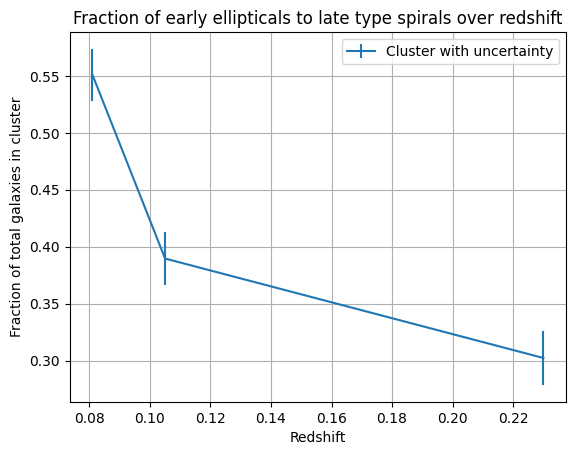

In [ ]:
# Plot for fration over redshift

Yvals = n.array([0.5509355509355509, 0.38963963963963966, 0.30238726790450926])
Xvals = n.array([0.081, 0.105, 0.230])
YUnc = n.array([0.022679433274685194, 0.02314372401751595, 0.023654745213677966])

m.errorbar(Xvals, Yvals, YUnc, label = "Cluster with uncertainty")
m.title("Fraction of early ellipticals to late type spirals over redshift")
m.ylabel("Fraction of total galaxies in cluster")
m.xlabel("Redshift")
m.legend(loc = "best")
m.grid()